In [1]:
import pandas as pd
from random import shuffle

In [2]:
datafile = "../data/model.xls"

In [3]:
df = pd.read_excel(datafile)

In [4]:
df

,电量趋势下降指标,线损指标,告警类指标,是否窃漏电
0,4,1,1,1
1,4,0,4,1
2,2,1,1,1
3,9,0,0,0
4,3,1,0,0
...,...,...,...,...
286,4,1,2,0
287,1,0,2,0
288,5,1,2,1
289,2,1,0,0


In [5]:
data = df.values

In [6]:
data

array([[4, 1, 1, 1],
       [4, 0, 4, 1],
       [2, 1, 1, 1],
       ...,
       [5, 1, 2, 1],
       [2, 1, 0, 0],
       [4, 1, 0, 0]], dtype=int64)

In [7]:
shuffle(data)

## 二、划分训练集和测试集

In [8]:
p = 0.8
train_num = int(len(data) * p)
train = data[:train_num, :]
test = data[train_num:, :]

In [9]:
train.shape

(232, 4)

## 三、 构建 LM 神经网络模型

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

Using TensorFlow backend.


In [11]:
netfile = "../tmp/net.model"

### 3.1 构建 3 层神经网络结构

In [12]:
net = Sequential()

net.add(Dense(input_dim=3, units=10))
net.add(Activation('relu'))
net.add(Dense(units=1))
net.add(Activation('sigmoid'))

### 3.2 神经网络的训练

In [13]:
net.compile(loss='binary_crossentropy',
           optimizer='adam',
#             class_mode='binary'# 加上抛异常：ValueError: Session keyword arguments are not support during eager execution. You passed: {'class_mode': 'binary'}
           )
net.fit(train[:, :3], 
        train[:, 3],
       epochs=1000,
       batch_size=50)

Epoch 1/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.7556
Epoch 2/1000
232/232 [==============================] - 0s 34us/step - loss: 0.7367
Epoch 3/1000
232/232 [==============================] - 0s 30us/step - loss: 0.7204
Epoch 4/1000
232/232 [==============================] - 0s 34us/step - loss: 0.7087
Epoch 5/1000
232/232 [==============================] - 0s 30us/step - loss: 0.6991
Epoch 6/1000
232/232 [==============================] - 0s 39us/step - loss: 0.6895
Epoch 7/1000
232/232 [==============================] - 0s 30us/step - loss: 0.6827
Epoch 8/1000
232/232 [==============================] - 0s 39us/step - loss: 0.6773
Epoch 9/1000
232/232 [==============================] - 0s 30us/step - loss: 0.6730
Epoch 10/1000
232/232 [==============================] - 0s 34us/step - loss: 0.6680
Epoch 11/1000
232/232 [==============================] - 0s 30us/step - loss: 0.6635
Epoch 12/1000
232/232 [==============================] - 0s 35us/step - los

### 3.3 模型保存

In [14]:
net.save_weights(netfile)

### 3.4 预测

In [15]:
pred_result = net.predict_classes(train[:, :3])

In [16]:
pred_result = pred_result.reshape(train_num)

In [17]:
pred_result

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

### 3.5 绘图

In [18]:
from cm_plot import cm_plot

[[148   7]
 [  9  68]] <class 'numpy.ndarray'> [[148   9]
 [  7  68]]


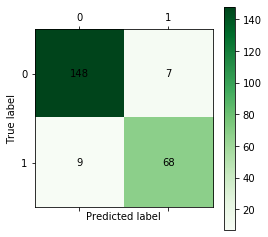

In [19]:
cm_plot(train[:, 3], pred_result).show()

### 3.6 精确率 vs 召回率

In [25]:
precision = 68 / (7 + 68)

In [26]:
recall = 68 / (9 + 68)

In [27]:
precision, recall

(0.9066666666666666, 0.8831168831168831)

### 后续为辅助代码

In [38]:
net.compile?

Signature:
net.compile(
    optimizer,
    loss=None,
    metrics=None,
    loss_weights=None,
    sample_weight_mode=None,
    weighted_metrics=None,
    target_tensors=None,
    **kwargs,
)
Docstring:
Configures the model for training.

# Arguments
    optimizer: String (name of optimizer) or optimizer instance.
        See [optimizers](/optimizers).
    loss: String (name of objective function) or objective function or
        `Loss` instance. See [losses](/losses).
        If the model has multiple outputs, you can use a different loss
        on each output by passing a dictionary or a list of losses.
        The loss value that will be minimized by the model
        will then be the sum of all individual losses.
    metrics: List of metrics to be evaluated by the model
        during training and testing. Typically you will use
        `metrics=['accuracy']`. To specify different metrics for different
        outputs of a multi-output model, you could also pass a dictionary,
    

In [28]:
Dense?

Init signature:
Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Docstring:     
Just your regular densely-connected NN layer.

`Dense` implements the operation:
`output = activation(dot(input, kernel) + bias)`
where `activation` is the element-wise activation function
passed as the `activation` argument, `kernel` is a weights matrix
created by the layer, and `bias` is a bias vector created by the layer
(only applicable if `use_bias` is `True`).

Note: if the input to the layer has a rank greater than 2, then
it is flattened prior to the initial dot product with `kernel`.

# Example

```python
    # as first layer in a sequential model:
    model = Sequential()
    model.add(Dense(32, input_shape=(16,)))
    # now the model will take as input arrays of 

In [22]:
train

array([[ 4,  1,  1,  1],
       [ 4,  0,  4,  1],
       [ 4,  1,  1,  1],
       [ 4,  1,  1,  1],
       [ 2,  1,  1,  1],
       [ 2,  0,  0,  0],
       [ 4,  1,  1,  1],
       [ 3,  1,  3,  1],
       [ 3,  1,  0,  0],
       [ 3,  1,  0,  0],
       [ 4,  1,  1,  1],
       [ 3,  1,  3,  1],
       [ 9,  0,  0,  0],
       [ 3,  1,  0,  0],
       [ 4,  1,  1,  1],
       [ 3,  1,  0,  0],
       [ 9,  0,  3,  1],
       [ 3,  1,  3,  1],
       [10,  1,  3,  1],
       [ 3,  1,  3,  1],
       [ 2,  0,  3,  0],
       [ 3,  1,  0,  0],
       [ 6,  0,  0,  0],
       [ 4,  0,  2,  0],
       [ 6,  0,  0,  0],
       [ 0,  0,  2,  0],
       [10,  1,  3,  1],
       [ 3,  0,  0,  0],
       [ 4,  1,  2,  1],
       [ 6,  0,  0,  0],
       [ 3,  0,  0,  0],
       [ 1,  0,  2,  0],
       [ 4,  0,  2,  0],
       [ 3,  1,  3,  1],
       [ 5,  1,  0,  0],
       [ 7,  0,  0,  0],
       [ 0,  0,  2,  0],
       [ 6,  0,  0,  0],
       [ 2,  0,  0,  0],
       [ 4,  0,  4,  1],


In [11]:
data

array([[4, 1, 1, 1],
       [4, 0, 4, 1],
       [4, 1, 1, 1],
       ...,
       [4, 1, 0, 0],
       [0, 1, 0, 0],
       [5, 0, 0, 0]], dtype=int64)

In [13]:
l = list(range(5))

In [14]:
l

[0, 1, 2, 3, 4]

In [19]:
shuffle(l)

In [20]:
l

[2, 3, 0, 1, 4]

In [59]:
import numpy as np

In [60]:
y = np.array([1 ,1 ,1 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,1 ,0 ,0 ,1 ,1 ,0 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,0 ,1 ,0 ,1 ,1
 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,1 ,0 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,1 ,1 ,1
 ,1 ,1 ,1 ,1 ,0 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,1 ,1 ,0 ,1 ,0 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0
 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0
 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,1 ,1 ,0 ,0
 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0
 ,0 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,0])

In [61]:
y_pred = np.array([1 ,1 ,1 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,1 ,0 ,0 ,1 ,1 ,0 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,0 ,1 ,0 ,1 ,1
 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,1 ,1 ,1
 ,1 ,1 ,1 ,1 ,0 ,1 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0
 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0
 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,1 ,0 ,0 ,0
 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0
 ,0 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,0])

In [113]:
len(y[(y==0) & (y_pred==0)])

144

In [114]:
len(y[(y==1) & (y_pred==0)])

7

In [115]:
len(y[(y==0) & (y_pred==1)])

7

In [116]:
len(y[(y==1) & (y_pred==1)])

74

In [20]:
y_true = train[:, 3]

In [21]:
len(y_true[(y_true==0) & (pred_result==0)]) # TN

148

In [22]:
len(y_true[(y_true==0) & (pred_result==1)]) # FP

7

In [23]:
len(y_true[(y_true==1) & (pred_result==0)]) # FN

9

In [24]:
len(y_true[(y_true==1) & (pred_result==1)]) # TP

68

## 4 CART 决策树模型

In [83]:
import importlib
from sklearn.tree import DecisionTreeClassifier

In [84]:
try:
    del cm_plot
except Exception as e:
    print(e)
finally:
    import cm_plot

name 'cm_plot' is not defined


In [85]:
treefile = "../tmp/tree.pkl"

In [86]:
tree = DecisionTreeClassifier()

In [87]:
tree.fit(train[:, :3], train[:, 3])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [88]:
from sklearn.externals import joblib

In [92]:
joblib.dump(tree, treefile)

['../tmp/tree.pkl']

In [93]:
y_pred = tree.predict(train[:, :3])

### 4.1 混淆矩阵绘图

[[153   2]
 [  7  70]] <class 'numpy.ndarray'> [[153   7]
 [  2  70]]


<module 'matplotlib.pyplot' from 'd:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

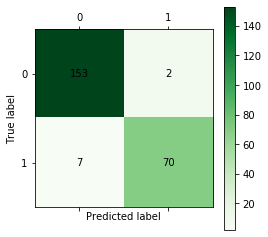

In [94]:
cm_plot.cm_plot(train[:, 3], y_pred)

### 4.2 决策树模型的 ROC 曲线

In [95]:
from sklearn.metrics import roc_curve

In [96]:
pred_result = net.predict(test[:, :3]).reshape(len(test))

In [97]:
pred_result

array([5.6188703e-02, 9.4308525e-02, 2.7479827e-03, 5.6188703e-02,
       2.7479827e-03, 4.3550092e-01, 8.3853602e-03, 5.5221617e-03,
       7.9411006e-01, 2.9416621e-02, 2.7479827e-03, 5.6188703e-02,
       2.7479827e-03, 3.7498176e-03, 1.7024279e-03, 2.3857951e-03,
       9.7985119e-02, 5.5371940e-01, 1.1226049e-01, 5.5221617e-03,
       8.6566806e-04, 7.0097011e-01, 9.9935865e-01, 5.6188703e-02,
       5.5221617e-03, 8.3853602e-03, 8.7550670e-02, 2.6593715e-02,
       5.6188703e-02, 2.9416621e-02, 1.7024279e-03, 2.9066801e-02,
       9.7873068e-01, 1.2729019e-02, 2.6348841e-01, 1.0062456e-03,
       1.7664373e-01, 1.2729019e-02, 1.0062456e-03, 5.6302547e-02,
       9.1390121e-01, 4.3550092e-01, 9.5671117e-01, 1.2729019e-02,
       1.1028531e-01, 2.6348841e-01, 8.3853602e-03, 9.0889227e-01,
       1.7664373e-01, 1.8556744e-02, 1.1226049e-01, 9.4308525e-02,
       5.6302547e-02, 8.6566806e-04, 1.2192726e-03, 4.3550092e-01,
       6.6275030e-01, 6.3662693e-02, 1.7023878e-03], dtype=flo

In [100]:
fpr, tpr, thresholds = roc_curve(test[:, 3], pred_result, pos_label=1)

In [101]:
fpr

array([0.        , 0.        , 0.        , 0.01886792, 0.01886792,
       0.03773585, 0.03773585, 0.05660377, 0.11320755, 0.22641509,
       0.26415094, 0.30188679, 0.33962264, 0.37735849, 0.47169811,
       0.50943396, 0.56603774, 0.73584906, 0.75471698, 0.83018868,
       0.8490566 , 0.88679245, 0.9245283 , 1.        ])

In [102]:
tpr

array([0.        , 0.16666667, 0.66666667, 0.66666667, 0.83333333,
       0.83333333, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [103]:
thresholds

array([1.9993587e+00, 9.9935865e-01, 9.1390121e-01, 9.0889227e-01,
       7.9411006e-01, 7.0097011e-01, 6.6275030e-01, 5.5371940e-01,
       4.3550092e-01, 1.1226049e-01, 9.7985119e-02, 9.4308525e-02,
       6.3662693e-02, 5.6302547e-02, 5.6188703e-02, 2.9416621e-02,
       1.8556744e-02, 5.5221617e-03, 3.7498176e-03, 2.7479827e-03,
       2.3857951e-03, 1.7024279e-03, 1.2192726e-03, 8.6566806e-04],
      dtype=float32)

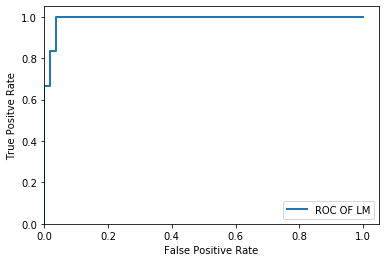

In [106]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, linewidth=2, label='ROC OF LM')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positve Rate")
plt.ylim(0, 1.05)
plt.xlim(0, 1.05)
plt.legend(loc=4)
plt.show()

In [99]:
roc_curve?

Signature:
roc_curve(
    y_true,
    y_score,
    pos_label=None,
    sample_weight=None,
    drop_intermediate=True,
)
Docstring:
Compute Receiver operating characteristic (ROC)

Note: this implementation is restricted to the binary classification task.

Read more in the :ref:`User Guide <roc_metrics>`.

Parameters
----------

y_true : array, shape = [n_samples]
    True binary labels. If labels are not either {-1, 1} or {0, 1}, then
    pos_label should be explicitly given.

y_score : array, shape = [n_samples]
    Target scores, can either be probability estimates of the positive
    class, confidence values, or non-thresholded measure of decisions
    (as returned by "decision_function" on some classifiers).

pos_label : int or str, default=None
    The label of the positive class.
    When ``pos_label=None``, if y_true is in {-1, 1} or {0, 1},
    ``pos_label`` is set to 1, otherwise an error will be raised.

sample_weight : array-like of shape (n_samples,), default=None
    Samp